# Amazon USA Products 2023 (1.4M Products)

## Dataset
Due to the dataset exceeding 100 MiB which GitHub blocks files larger than 100 MiB please see the below link to the full dataset.

https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products/data

The two datasets are amazon_categories.csv & amazon_products.csv

amazon_categories contains the following:
- id
- category_name

amazon_products contains the following:
- asin	
- title	
- imgUrl	
- productURL	
- stars	
-reviews
- price	
- listPrice	
- category_id	
- isBestSeller	
- boughtInLastMonth

The Amazon Products Dataset 2023 was Scraped from Sep 2023

# Project Objective

Using Python conduct an exploratory data analysis on the Amazon Products Dataset.
The objective of this project is to answer the following questions:

1. How many products are Best Sellers?
2. How many of these BestSeller products were purchased in the last month?
3. Calculate total sales performance in the last month (boughtInLastMonth)?
4. Calculate Revenue per product
5. Calculate the total money volume for the whole dataset.
6. Identify Top Rated Products by Top 20 Categories
7. Identify Top 20 Products bought in the last month across all product categories



# Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import csv

# Step 2: Load Datasets

In [2]:
# loading datasets
categories_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\\Projects\\Amazon Products 2023\\amazon_categories.csv")
products_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\Projects\\Amazon Products 2023\\amazon_products.csv")

In [3]:
# view first few rows of each dataset
categories_df.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [4]:
products_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


# Step 3: Data Cleaning

In [5]:
# Check the number of rows and columns.
cat_rows = categories_df.shape[0] # Gives num of rows
cat_col = categories_df.shape[1] # gives num of cols
prod_row = products_df.shape[0] # Gives num of rows
prod_col = products_df.shape[1] # gives num of cols

print("categories_df Row Count: " + str(cat_rows))
print("cateogires_df column Count: " + str(cat_col))

print("products_df Row Count: " + str(prod_row))
print("products_df Column Count: " + str(prod_col))

categories_df Row Count: 248
cateogires_df column Count: 2
products_df Row Count: 1426337
products_df Column Count: 11


In [6]:
# Identify any missing values
print(categories_df.isnull().sum())
print(products_df.isnull().sum())

id               0
category_name    0
dtype: int64
asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


In [7]:
# find the null value in products_df 
missing_title = products_df[products_df['title'].isnull()]
print(missing_title)

               asin title                                             imgUrl  \
1206102  B00758A9CE   NaN  https://m.media-amazon.com/images/I/71+50RU8o2...   

                                   productURL  stars  reviews  price  \
1206102  https://www.amazon.com/dp/B00758A9CE    5.0        0  33.08   

         listPrice  category_id  isBestSeller  boughtInLastMonth  
1206102        0.0           19         False                  0  


In [8]:
# Use other information to try fill the missing title name.
prod_filter = products_df.loc[products_df['category_id'] == 19]
print(prod_filter)

               asin                                              title  \
1198836  B09DH98QL2  Chemical Guys HOL363 16-Piece Arsenal Builder ...   
1198837  B0C6DZZ4MN  Car Wash Kit -Car Wash Cleaning Kit Car Interi...   
1198838  B0CBZ12S15  Car Vacuum Cleaner High Power Cordless, 16000p...   
1198839  B08BRJHJF9  Microfiber Cleaning Cloth Grey - 12 packs 16"x...   
1198840  B06ZY896ZM  ThisWorx Car Vacuum Cleaner - Car Accessories ...   
...             ...                                                ...   
1207490  B093Q3RKB5  Car Cleaning Kit Buffing Pads Sponge Waxing an...   
1207491  B093CLN9YG  VViViD Essentials Car Cleaning, Waxing and Pol...   
1207492  B08RCV9DTM  Tires and Plastic Restoration - Professional C...   
1207493  B08HRMRJ95  Cleaning Washcloth Towels - Large 27" x 16" Mi...   
1207494  B08GG9W1WJ                Collinite 845 476s Double 520 Combo   

                                                    imgUrl  \
1198836  https://m.media-amazon.com/images/I/81xa

In [9]:
# Update column width to see full string of title column to make sure product title is being named 
# the same as what is shown in the productURL.
pd.set_option('display.max_colwidth', None)
with pd.option_context('display.max_colwidth', None):
    print(prod_filter)

               asin  \
1198836  B09DH98QL2   
1198837  B0C6DZZ4MN   
1198838  B0CBZ12S15   
1198839  B08BRJHJF9   
1198840  B06ZY896ZM   
...             ...   
1207490  B093Q3RKB5   
1207491  B093CLN9YG   
1207492  B08RCV9DTM   
1207493  B08HRMRJ95   
1207494  B08GG9W1WJ   

                                                                                                                                                                                                       title  \
1198836  Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)   
1198837                                          Car Wash Kit -Car Wash Cleaning Kit Car Interior Detailing Kit with Car Wash Foam Gun,Microfiber Sponge Car Care Kit,Tire Brush, Car Wash Kit with Foam Gun   
1198838          Car Vacuum Cleaner High Power Cordless, 16000pa Small Handheld Vacuum for Car with

In [10]:
# Update Null value with product name from productURL.
# productURL is https://www.amazon.com/dp/B09DH98QL2?th=1

# Update the missing value with the given string from productURL
products_df['title'].fillna("Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)", inplace=True)

# Check if NULL value is replaced
print(products_df[products_df['title'].isnull()]) # should return an emptpy dataframe

# double checking
print(products_df.loc[products_df['asin'] == 'B00758A9CE']) # using unique asin from above

C:\Users\Tim\AppData\Local\Temp\ipykernel_14144\2887489447.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['title'].fillna("Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)", inplace=True)


Empty DataFrame
Columns: [asin, title, imgUrl, productURL, stars, reviews, price, listPrice, category_id, isBestSeller, boughtInLastMonth]
Index: []
               asin  \
1206102  B00758A9CE   

                                                                                                                                                                                                       title  \
1206102  Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)   

                                                                 imgUrl  \
1206102  https://m.media-amazon.com/images/I/71+50RU8o2L._AC_UL320_.jpg   

                                   productURL  stars  reviews  price  \
1206102  https://www.amazon.com/dp/B00758A9CE    5.0        0  33.08   

         listPrice  category_id  isBestSeller  boughtInLastMonth  
1206102        0.0      

In [11]:
# Verify changes to check if anymore NULL values in products_df
print(products_df.isnull().sum())

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


#### Next Steps:
1. <b>Remove duplicates IDs:</b> Now that there are no NULL values in the dataset, the next step is to eliminate any duplicate entries in the 'id' column of categories_df to ensure data integrity.

2. <b>Validate Matching Keys:</b> Before merging the datasets, we need to verify that the 'id' values in categories_df align correctly with the 'category_id' values in products_df. This step ensures a smooth and accurate join.

3. <b>Merge the Datasets:</b> Once the key columns are validated, we will combine categories_df and products_df by joining on 'id' (from categories_df) and 'category_id' (from products_df). This will integrate category information with product details for further my final analysis and dataset used for my tableau dashboard.

In [12]:
# Check for duplicates in categories_df
categories_df.duplicated().sum()

np.int64(0)

In [13]:
products_df.duplicated().sum()

np.int64(0)

In [14]:
# Comparing id column from amazon_categories.csv to product_id in amazon_products.csv to ensure these categories are matching
cat_filter = categories_df.loc[categories_df['id'] == 19]
print(cat_filter)

prod_filter = products_df.loc[products_df['category_id'] == 19, ['title', 'category_id']]
print(prod_filter)

    id category_name
18  19      Car Care
                                                                                                                                                                                                       title  \
1198836  Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)   
1198837                                          Car Wash Kit -Car Wash Cleaning Kit Car Interior Detailing Kit with Car Wash Foam Gun,Microfiber Sponge Car Care Kit,Tire Brush, Car Wash Kit with Foam Gun   
1198838          Car Vacuum Cleaner High Power Cordless, 16000pa Small Handheld Vacuum for Car with Blower, Powerful Hand Vacuum Rechargeable, Type-C Fast Charging, Portable Car Vacuum for Car/Home/Office   
1198839      Microfiber Cleaning Cloth Grey - 12 packs 16"x16" - High Performance - 1200 Washes, Ultra Absorbent Towels Weave 

In [15]:
uniquie_prod_id = products_df['category_id'].nunique()
print("Total unique category_id in products_df: " + str(uniquie_prod_id))

unique_cat_id = categories_df['id'].nunique()
print("Total unique id in categories_df: " + str(unique_cat_id))

Total unique category_id in products_df: 248
Total unique id in categories_df: 248


After comparing both categories_df & products_df datasets we can see that 'id' in categories_df matches the 'category_id' in the products_df after looking at specific cateogory names and product titles.

In [16]:
# Merge products_df with categories_df using a left join
merged_df = products_df.merge(categories_df, left_on = 'category_id', right_on = 'id', how = 'left')

# Checking if all categories have been successfully merged:
print(merged_df[['category_id','category_name']].drop_duplicates())

         category_id                           category_name
0                104                               Suitcases
924              110                          Men's Clothing
17994            245  Xbox 360 Games, Consoles & Accessories
21427            114                             Men's Shoes
38519            112                       Men's Accessories
...              ...                                     ...
1387414          204       Paint, Wall Treatments & Supplies
1392744          106                          Rain Umbrellas
1394518          105                      Travel Accessories
1414536          137     Stationery & Gift Wrapping Supplies
1414992           26           Car Electronics & Accessories

[248 rows x 2 columns]


the results shown above match the Total unique category_id in products_df: 248

In [17]:
# Dropping redundant columns.
merged_df.drop(columns=['id','imgUrl','productURL'], inplace=True)

In [18]:
# Preview merged_df to see if id column is dropped & if category_name column added.
merged_df.tail()

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Mesh Snap Back Trucker Hat,4.2,0,14.95,0.00,112,False,0,Men's Accessories
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Brim Fitted Hat,4.4,0,33.99,0.00,112,False,0,Men's Accessories
1426334,B07X1MVNT1,"[4 Pack] Adjustable Eyeglasses and Sunglasses Holder Strap Cord for Sports, Anti-slippery Eyeglass Retainer with One Free Microfiber Cleaning Cloths(4 Pack)",3.6,0,8.54,0.00,112,False,0,Men's Accessories
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,4.5,0,54.36,57.39,112,False,0,Men's Accessories
1426336,B07GH67QC8,in Hoc Signo Vinces Knights Templar Masonic Embroidered Black Adjustable Baseball Cap,4.9,0,18.79,0.00,112,False,0,Men's Accessories


To help make my analysis easier and gather insights on whether: 
1. find out total products which are bestsellers
1. Group by isBestSeller by category_name


1. Sales Performance Across Categories
2. Impact of Customer Ratings & reviews on Sales

I will aggregate these fields and merge the aggegrated data & newly merged merged_df into a final dataset

In [19]:
# 1. Find out total counts of best sellers products and not best sellers
bestSeller_cnt = merged_df['isBestSeller'].value_counts()
print(bestSeller_cnt)
# Group first then count how many best seller products by category

isBestSeller
False    1417817
True        8520
Name: count, dtype: int64


In [20]:
# Convert bestSeller_cnt to an int
# This will make it easier when doing analysis or plotting.
merged_df['isBestSeller'] = merged_df['isBestSeller'].astype(int)
merged_df.head()

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch",4.5,0,139.99,0.00,104,0,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue,4.5,0,169.99,209.99,104,0,1000,Suitcases
2,B07XSCCZYG,"Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch",4.6,0,365.49,429.99,104,0,300,Suitcases
3,B08MVFKGJM,"Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)",4.6,0,291.59,354.37,104,0,400,Suitcases
4,B01DJLKZBA,"Winfield 2 Hardside Expandable Luggage with Spinner Wheels, Checked-Large 28-Inch, Deep Blue",4.5,0,174.99,309.99,104,0,400,Suitcases


In [21]:
# check if isBestSeller column has been converted correctly to an int
bestSeller_cnt = merged_df['isBestSeller'].value_counts()
print(bestSeller_cnt)

isBestSeller
0    1417817
1       8520
Name: count, dtype: int64


Create a new dataframe which contains the record of Not Best Seller and Best Seller

In [22]:
is_bestseller_data = pd.DataFrame({'isBestSeller': bestSeller_cnt.index, 'Count': bestSeller_cnt.values})
print(is_bestseller_data)

   isBestSeller    Count
0             0  1417817
1             1     8520


In [23]:
# Create custom label
seller_label = {0: "Not Bestseller", 1: "Bestseller"}
is_bestseller_data['isBestSeller'] = is_bestseller_data['isBestSeller'].map(seller_label)
print(is_bestseller_data)
# use output to create graph for isBestSeller

     isBestSeller    Count
0  Not Bestseller  1417817
1      Bestseller     8520


### 3. Now that the cleaning of the data (step 3) has been completed we can visualise the and identify and answer useful insights from the data.

# Step 4 - Asking and answering interesting questions.

The project objective was to find answers the following questions.
1. <b>Analyse Sales Performance Across Categories:</b> Identify which product categories contribute the most to total sales.

2. <b>Assess the Impact of Customer Ratings & reviews on Sales:</b> Investigate whether higher-rated products generate more sales compared to lower-rated ones.
-- Change this to total sales...

3. <b>Determine Profitable Niches:</b> Explore which niches have the highest conversion rates and consistent sales trends.

### 4.1 How many products are Best Sellers?

-  Display on a piechart which shows the percentage of how many products from Amazon 2023 are either BestSellers and NotBestSellers

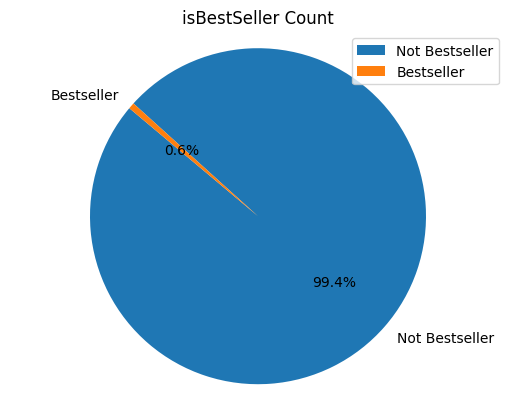

In [24]:
# Count the occurance of True and False in the 'BestSeller' Column
bestSeller_cnt = merged_df['isBestSeller'].value_counts()

# Create a DataFrame for the pie chart
is_bestseller_data = pd.DataFrame({'isBestSeller': bestSeller_cnt.index, 'Count': bestSeller_cnt.values})

# Define labels
seller_label = {0: "Not Bestseller", 1: "Bestseller"}

# Replace values in dataframe with custom labels
is_bestseller_data['isBestSeller'] = is_bestseller_data['isBestSeller'].map(seller_label)

# Create and display the Pie Chart
plt.pie(
    is_bestseller_data['Count']                    # The sizes of each pie slice
    , labels=is_bestseller_data['isBestSeller']    # The labels: "Bestseller", "Not Bestseller"
    , autopct='%1.1f%%'                            # show percentage on pie
    , startangle=140                               #  start angle for better visual
)
plt.title("isBestSeller Count")
plt.axis('equal')  # Keeps the pie chart circular
plt.legend(loc='upper right')
plt.show()


- The bestSeller products are 0.6%
- Not BestSeller products are  99.4%
- Total count of 8520 for BestSeller
- Total count of 1417817 for Not BestSeller

### 4.2 How many of these BestSeller products were purchased in the last month?

In [25]:
# Unique value of Items boughtInLastMonth
merged_df['boughtInLastMonth'].nunique()

30

In [26]:
# Group BestSeller with boughtInLastMonth
sum_boughtInLastMonth = merged_df.groupby(['isBestSeller'])['boughtInLastMonth'].sum()
print(sum_boughtInLastMonth)

isBestSeller
0    182702500
1     19812100
Name: boughtInLastMonth, dtype: int64


- Visualise our findings onto a graph to clearly see how many bestSellers were in the boughtInLastMonth

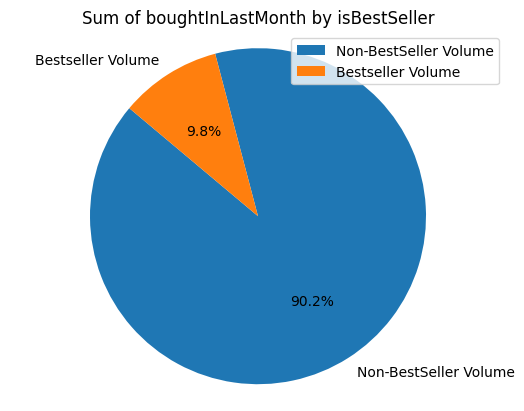

In [27]:
# Calculate the sum of boughtInlastMonth for IsBestSeller and Group this
sum_boughtInLastMonth = merged_df.groupby(['isBestSeller'])['boughtInLastMonth'].sum()

# Define custom labels
custom_labels = {0: "Non-BestSeller Volume", 1: "Bestseller Volume"}

# Map index to custom labels
labels = [custom_labels[i] for i in sum_boughtInLastMonth.index]

# Create and display the Pie Chart
plt.pie(
    sum_boughtInLastMonth                   
    , labels=labels                  # Show the string labels
    , autopct='%1.1f%%'                            # show percentage on pie
    , startangle=140                               #  start angle for better visual
)
plt.title("Sum of boughtInLastMonth by isBestSeller")
plt.axis('equal')  # Keeps the pie chart circular
plt.legend(loc='upper right')
plt.show()

- The above pie chart shows the volume of bestSeller products and NotBestSeller products which were bought in the last month.
- 9.8% of products were bought by bestSellers
- 90.2% of products were bought by Non-BestSellers

### 4.3 Calculate total sales performance in the last month (boughtInLastMonth)?

In [28]:
# Group category_name and BoughtInLastMonth and sum total sales
total_cat_sales = merged_df.groupby(['category_name'])['boughtInLastMonth'].sum().reset_index()
total_cat_sales

,category_name,boughtInLastMonth
0,Abrasive & Finishing Products,160300
1,Accessories & Supplies,832100
2,Additive Manufacturing Products,94100
3,Arts & Crafts Supplies,1346550
4,"Arts, Crafts & Sewing Storage",197550
...,...,...
243,Women's Watches,68700
244,"Xbox 360 Games, Consoles & Accessories",15400
245,"Xbox One Games, Consoles & Accessories",35900
246,"Xbox Series X & S Consoles, Games & Accessories",42300


- I have grouped the data by product cateogry name and summed the total sales from last month.

In [29]:
# Lets order the above to show the max sales.
total_cat_sales = total_cat_sales.sort_values(['boughtInLastMonth'], ascending=[False])
total_cat_sales

,category_name,boughtInLastMonth
119,Kitchen & Dining,10432300
83,Hair Care Products,8012850
100,Industrial & Scientific,7093350
97,Household Cleaning Supplies,6875700
188,Skin Care Products,6612150
...,...,...
52,Computer Servers,0
213,Tablet Replacement Parts,0
200,Smart Home: Smart Locks and Entry,0
203,Smart Home: WiFi and Networking,0


In [30]:
# Display the top 20 largest category sales last month
top_20_cat_sales = total_cat_sales.nlargest(20, 'boughtInLastMonth')
top_20_cat_sales



,category_name,boughtInLastMonth
119,Kitchen & Dining,10432300
83,Hair Care Products,8012850
100,Industrial & Scientific,7093350
97,Household Cleaning Supplies,6875700
188,Skin Care Products,6612150
86,Health & Household,6138000
220,Toys & Games,5858000
94,Home Storage & Organization,5356200
60,Dog Supplies,4576650
98,Household Supplies,4289000


- The above shows the top 20 Product Cateogies which sold the highest in boughtInLastMonth.

<function matplotlib.pyplot.show(close=None, block=None)>

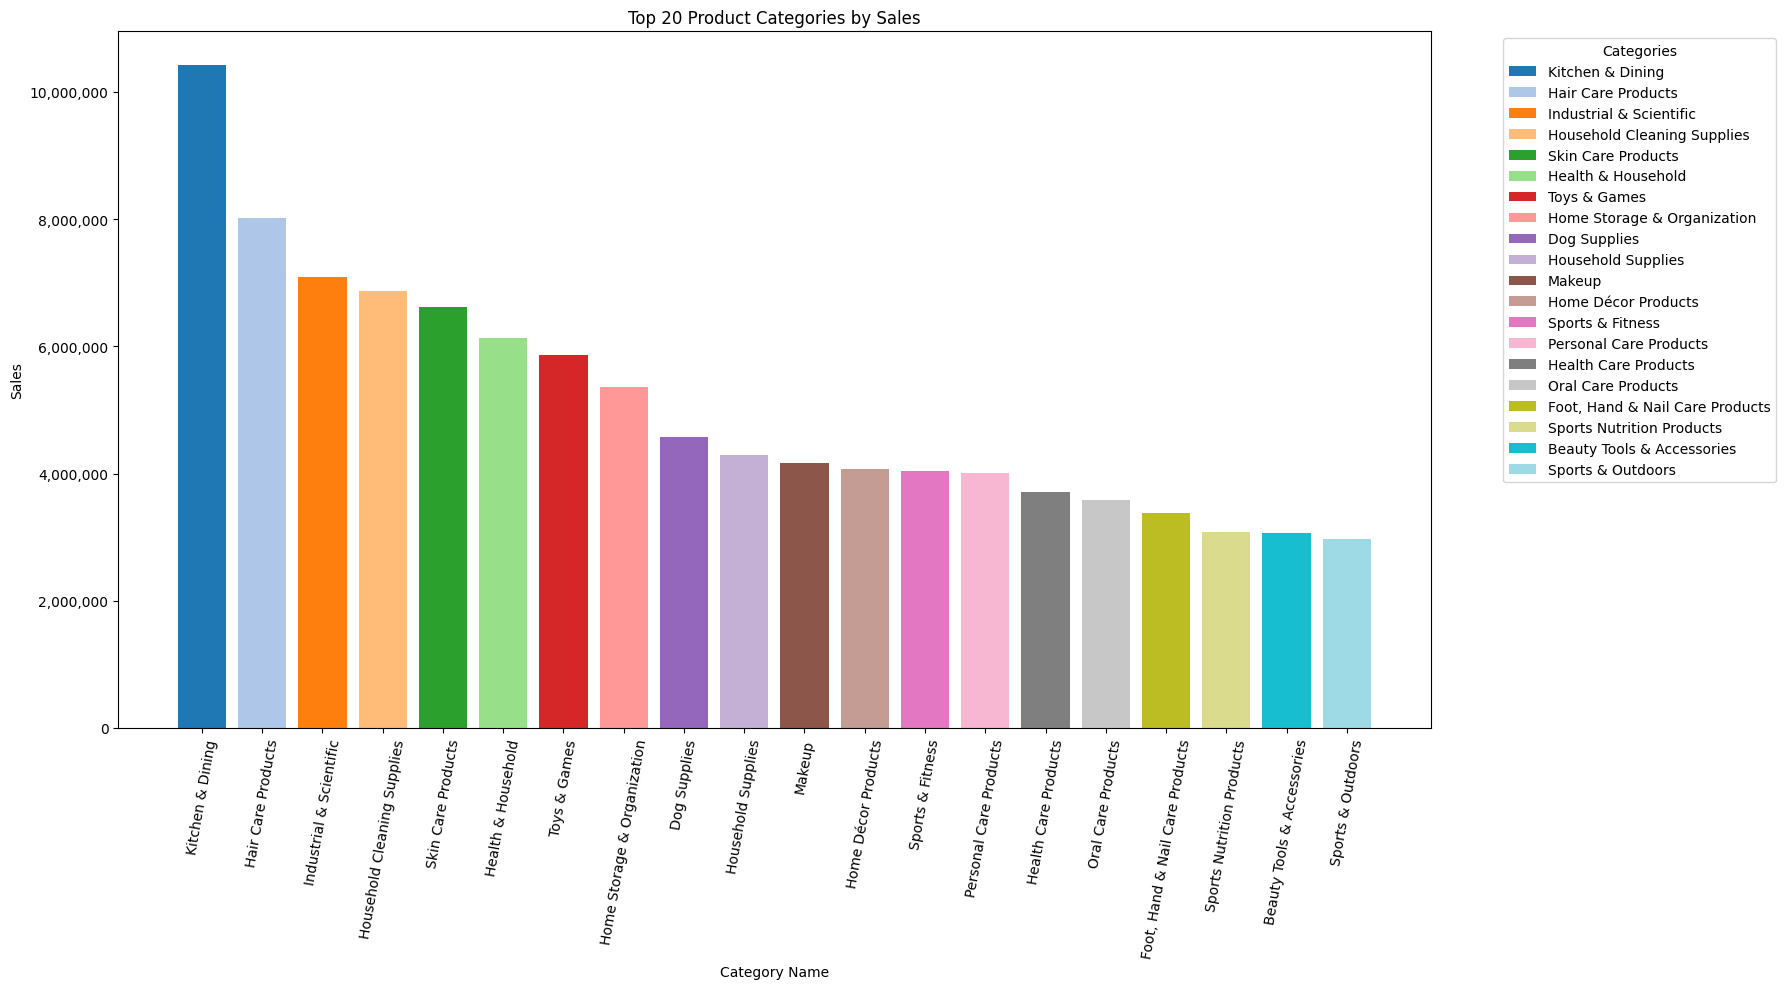

In [31]:
import matplotlib.ticker as mtick
# Display our findings in a Bar Chart
# Data to use in graph
# Group category_name and BoughtInLastMonth and sum total sales
total_cat_sales = merged_df.groupby(['category_name'])['boughtInLastMonth'].sum().reset_index()
# Lets order the above to show the max sales.
total_cat_sales = total_cat_sales.sort_values(['boughtInLastMonth'], ascending=[False])
# Display the top 20 largest sales last month
top_20_cat_sales = total_cat_sales.nlargest(20, 'boughtInLastMonth')


# Create bar chart
plt.figure(figsize=(18,10)) # makes the chart wider for readability



# Custom colors — 20 different colors
colors = plt.cm.tab20.colors  # You can also try plt.cm.Set3, plt.cm.Pastel1, etc.
# Plot bars and keep a handle to add legend
bars = plt.bar(top_20_cat_sales['category_name'], top_20_cat_sales['boughtInLastMonth'], color=colors)
# Legend with category names
plt.legend(bars, top_20_cat_sales['category_name'], title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')



# formatting
plt.title('Top 20 Product Categories by Sales')
plt.xlabel('Category Name')
plt.ylabel('Sales')
# Format y-axis to show full numbers with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=80)  # Rotates category names to prevent overlap
plt.tight_layout()  # Adjust layout to fit x-labels
plt.show

- The above graph shows the top selling product category name sold in the last month.
- We can see that Kitchen and & Dining dominates with over 10 Million units sold, followed by Hair Care Products and Industrial & Scientific.
    - These top 3 categories alone represent a significant portion of overall sales, indicating strong consumer demand or effective marketing in these areas.
- There is a cateogry overlap in Personal & Health care:
    - Several mid-to-low-ranking categories such as Skin Care Products, Health & Household, Personal Care Products, and Health Care Products point to a saturated but consistently performing market in the personal and health care space, warranting further segmentation analysis.

### 4.4. Calculate Revenue per product

- We are going to calculate total revenue generated for each product purchased on Amazon US.
- To determine this, we will use the following formula:
    - Revenue = Price x Quantity Sold (boughtInLastMonth)
- This calculation will give us the total sales volume for each product, representing the total amount spent by customers during the last month.

In [32]:
# Calculate Total Revenue for per product
# price * boughtInLastMonth
merged_df['revenue'] = merged_df['price'] * merged_df['boughtInLastMonth']
merged_df.head()

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,revenue
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch",4.5,0,139.99,0.00,104,0,2000,Suitcases,279980.0
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue,4.5,0,169.99,209.99,104,0,1000,Suitcases,169990.0
2,B07XSCCZYG,"Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch",4.6,0,365.49,429.99,104,0,300,Suitcases,109647.0
3,B08MVFKGJM,"Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)",4.6,0,291.59,354.37,104,0,400,Suitcases,116636.0
4,B01DJLKZBA,"Winfield 2 Hardside Expandable Luggage with Spinner Wheels, Checked-Large 28-Inch, Deep Blue",4.5,0,174.99,309.99,104,0,400,Suitcases,69996.0


In [33]:
# Group the data by 'category_name' and calculate the total revenue for each category
cat_revenue = merged_df.groupby(['category_name'])['revenue'].sum().reset_index()
cat_revenue

,category_name,revenue
0,Abrasive & Finishing Products,2473551.5
1,Accessories & Supplies,28835010.0
2,Additive Manufacturing Products,4006343.5
3,Arts & Crafts Supplies,17620588.5
4,"Arts, Crafts & Sewing Storage",3305590.5
...,...,...
243,Women's Watches,2323568.0
244,"Xbox 360 Games, Consoles & Accessories",538222.0
245,"Xbox One Games, Consoles & Accessories",2068048.5
246,"Xbox Series X & S Consoles, Games & Accessories",2486545.0


- The above shows category_name and how much revenue was generated for that product category
- e.g Abrasive & Finishing Products we can see has a total revenue of $2473551.5


In [34]:
# Sort the categories by money volume in descending order and select the top 20
top_20_rev_cat = cat_revenue.nlargest(20, 'revenue')
top_20_rev_cat

,category_name,revenue
119,Kitchen & Dining,267189588.0
83,Hair Care Products,152940697.5
94,Home Storage & Organization,138604708.5
220,Toys & Games,135394508.5
100,Industrial & Scientific,130196201.5
97,Household Cleaning Supplies,120567961.5
188,Skin Care Products,119996888.5
60,Dog Supplies,102992041.0
148,Office Electronics,95038114.0
86,Health & Household,93895499.0


- The top 20 Product Categories which generated the most revenue last month.

<function matplotlib.pyplot.show(close=None, block=None)>

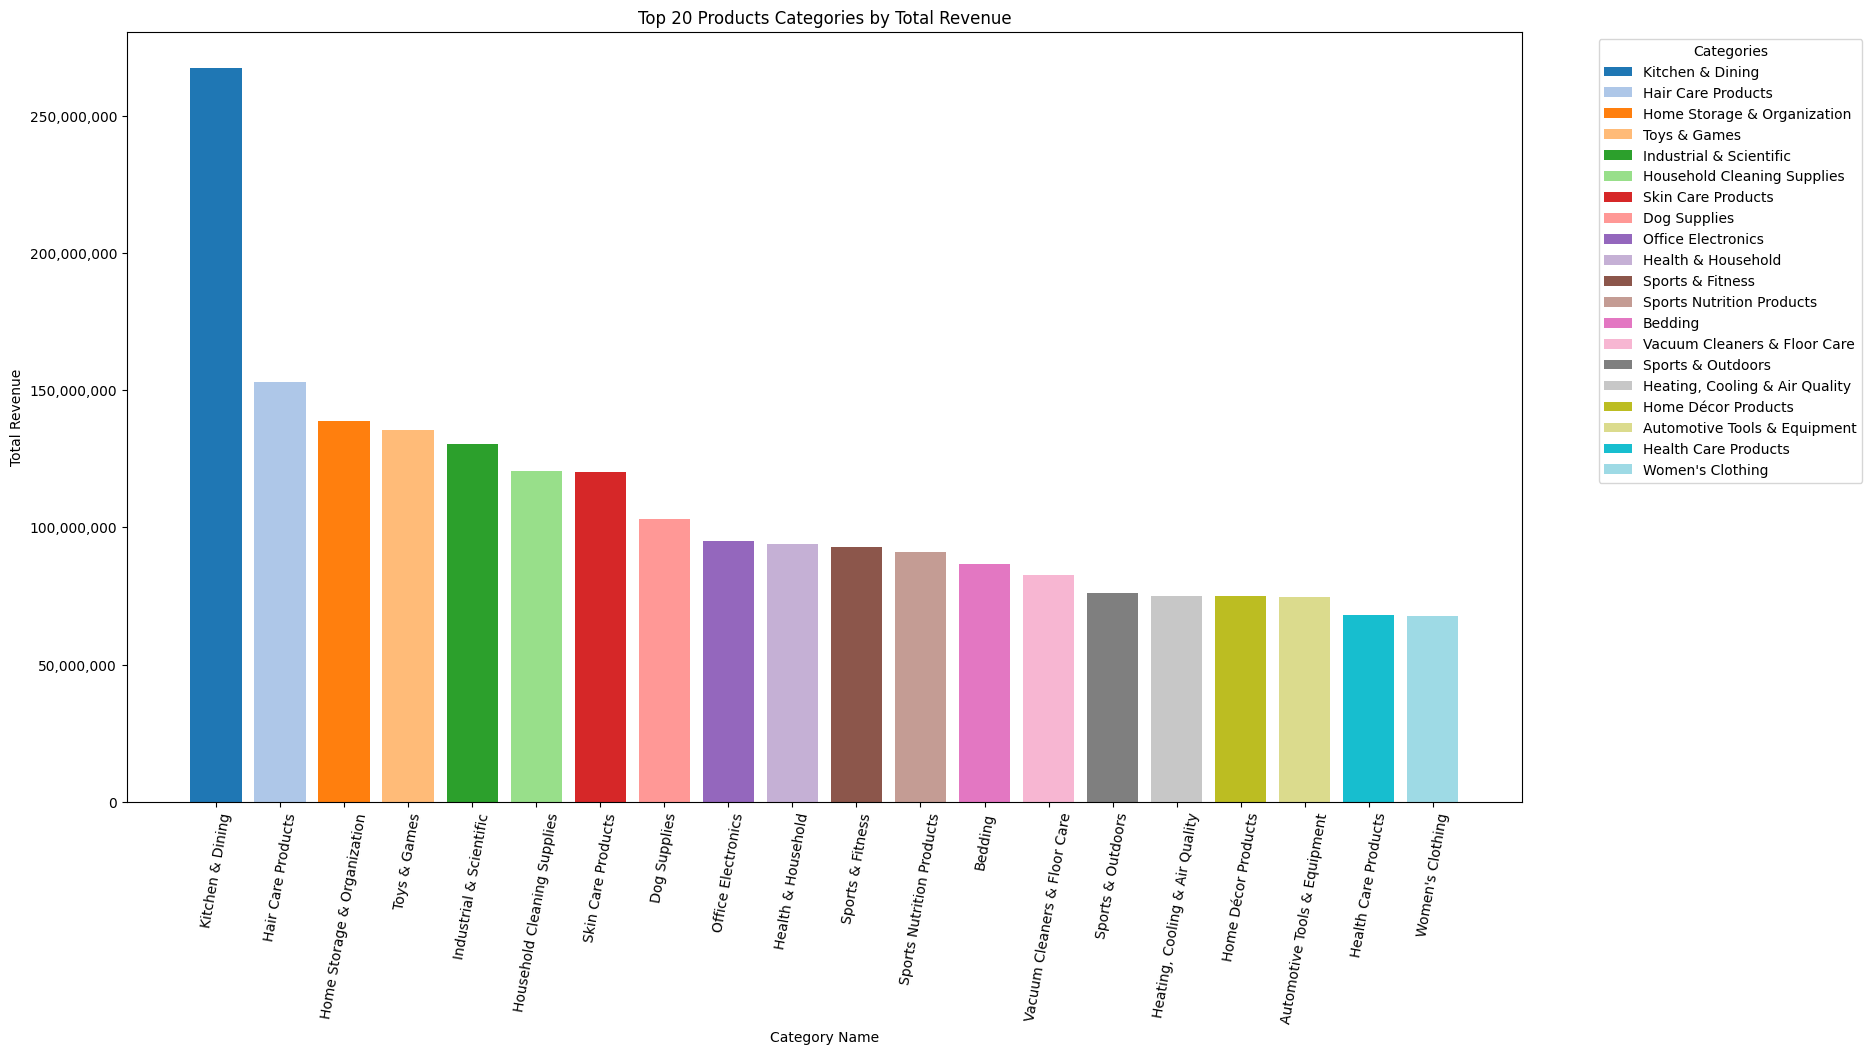

In [35]:
# graph the above in a bar chart
# Data to use in graph
cat_revenue = merged_df.groupby(['category_name'])['revenue'].sum().reset_index()
top_20_rev_cat = cat_revenue.nlargest(20, 'revenue')

# Create bar chart
plt.figure(figsize=(18,10))

# custom colors - 20 diff colours
color = plt.cm.tab20.colors

# plot bars and keep as a handle for the legend
bars = plt.bar(
    top_20_rev_cat['category_name'], 
    top_20_rev_cat['revenue'], 
    color=color
    )
plt.legend(bars, top_20_rev_cat['category_name'], title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# formatting
plt.title('Top 20 Products Categories by Total Revenue')
plt.xlabel('Category Name')
plt.ylabel('Total Revenue')
# format y-axis to show full numbers with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=80) # rotate category names
plt.tight_layout
plt.show

- The above graph shows the categories which generated the most revenue in the last month.
- Kitchen & Dining dominates revenue, generating significantly more than any other category — over ~$260 million, far ahead of the second-highest category.
- Top 5 categories (Kitchen & Dining to Industrial & Scientific) account for a substantial portion of total revenue, indicating a strong consumer preference for practical, everyday use items.

### 4.5.Calculate the total money volume for the whole dataset.

In [36]:
total_money_volume = (merged_df['price'] * merged_df['boughtInLastMonth']).sum()
print(total_money_volume)

4650777510.5


In [37]:
# format the total money volume with separator and curreny symbol
formatted_total_money_volume = f"${total_money_volume:,.2f}"
print(f"Total Money volume for the Entire Dataset: {formatted_total_money_volume}")

Total Money volume for the Entire Dataset: $4,650,777,510.50


### 4.6 Identify Top Rated Products by Top 20 Categories

In [38]:
# Average reviews of the products
average_reviews = merged_df['reviews'].mean()
print(f'Average number of reviews: {average_reviews:.2f}')

Average number of reviews: 180.75


In [39]:
merged_df.sort_values(['reviews'], ascending=[False])

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,revenue
1070592,B00T0C9XRK,essence | Lash Princess False Lash Effect Mascara | Gluten & Cruelty Free,4.3,346563,4.99,0.00,48,1,100000,Makeup,499000.0
47104,B09MV3KMPT,"ThisWorx Cordless Car Vacuum - Portable, Mini Handheld Vacuum w/Rechargeable Battery and 3 Attachments - High-Powered Vacuum Cleaner w/ 60w Motor",4.0,292474,49.99,0.00,175,1,2000,Vacuum Cleaners & Floor Care,99980.0
1075493,B07VMNJHBK,"Full Size Sheet Set - Breathable & Cooling Sheets - Hotel Luxury Bed Sheets - Extra Soft Sheets for Kids, Teens, Women & Men - Deep Pockets - 4 Piece Set - Comfy - Wrinkle Free - Light Grey Bed Sheets",4.5,281661,28.99,38.99,172,1,2000,Kids' Home Store,57980.0
1075468,B09JVTQKDN,"Queen Size Sheet Set - Breathable & Cooling Sheets - Hotel Luxury Bed Sheets for Women, Men Kids & Teens - Deep Pockets - 4 Piece Set - Soft & Wrinkle Free - Off White Bed Sheets - Comfy Queen Sheets",4.5,281661,32.99,39.99,172,1,2000,Kids' Home Store,65980.0
1075466,B07PH22TG9,"Queen Size Sheet Set - Breathable & Cooling Sheets - Hotel Luxury Bed Sheets for Women, Men Kids & Teens - Deep Pockets - 4 Piece Set - Soft & Wrinkle Free - Spa Blue Bed Sheets - Queen Sheets - 4PC",4.5,281661,32.99,39.99,172,1,1000,Kids' Home Store,32990.0
...,...,...,...,...,...,...,...,...,...,...,...
12,B07QXD3J9G,"Crew Versapack Softside Expandable 8 Spinner Wheel Luggage, USB Port, Men and Women, Jet Black, Carry on 20-Inch",4.5,0,323.99,0.00,104,0,100,Suitcases,32399.0
13,B081JDHNX1,"Centric 2 Hardside Expandable Luggage with Spinners, True Navy, 3-Piece Set (20/24/28)",4.5,0,399.92,699.97,104,0,100,Suitcases,39992.0
14,B07DMBG7CX,Xpedition 30 Inch Multi-Pocket Upright Rolling Duffel Bag,4.3,0,42.00,0.00,104,0,300,Suitcases,12600.0
15,B0B2X1BDFH,"Stratum 2.0 Expandable Hardside Luggage with Spinner Wheels, 28"" SPINNER, Slate Blue",4.5,0,89.95,139.99,104,0,300,Suitcases,26985.0


Instead of using the mean (which is pulled down by many low-review products), use the 90th or 95th percentile.
This will give us a threshold of the minimum reviews we will look at in our analysis.

In [40]:
threshold = merged_df['reviews'].quantile(0.95)
print(f"90th percentile reviews threshold: {threshold}")

90th percentile reviews threshold: 531.0


Filter on products with reviews greater and equal to 550.

In [41]:
# Filter the products with at least 550 reviews
filtered_merged_df = merged_df[merged_df['reviews'] >= 550]
filtered_merged_df.head(5)

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,revenue
46968,B08XWVX62X,"Eureka NEC185 Cordless Stick Vacuum Cleaner Convenient for Hard Floors, Rechargeable Handheld Vacuum Cleaner Portable with Powerful Motor Efficient Suction,White",4.1,27918,152.99,169.99,175,0,600,Vacuum Cleaners & Floor Care,91794.0
46969,B009ZJ2M7G,"Hoover Power Scrub Deluxe Carpet Cleaner Machine, Upright Shampooer, FH50150NC, Red, 27",4.5,47104,181.36,239.99,175,0,4000,Vacuum Cleaners & Floor Care,725440.0
46971,B091SWWH59,"Eureka PowerSpeed Bagless Upright Vacuum Cleaner, Pet Turbo, Black",4.4,14469,99.99,0.00,175,1,3000,Vacuum Cleaners & Floor Care,299970.0
46972,B005KMDV9A,"Shark NV356E Navigator Lift-Away Professional Upright Vacuum with Swivel Steering, HEPA Filter, XL Dust Cup, Pet Power, Dusting Brush, and Crevice Tool, Perfect for Pet Hair, White/Silver",4.5,34651,199.99,0.00,175,0,5000,Vacuum Cleaners & Floor Care,999950.0
46973,B09QQ9T4XY,Tineco iFLOOR 3 Breeze Complete Wet Dry Vacuum Cordless Floor Cleaner and Mop One-Step Cleaning for Hard Floors,4.4,25614,279.99,0.00,175,0,6000,Vacuum Cleaners & Floor Care,1679940.0


Filter products within the top 20 Categories with reviews >= 550

In [42]:
# Filter products within the top 20 Categories with largest sales and have reviews >= 550
filtered_merged_df = filtered_merged_df[filtered_merged_df['category_name'].isin(top_20_cat_sales['category_name'])]
filtered_merged_df.head(5)


,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,revenue
152462,B0B9JPWSC5,"iHaHa Fire Truck Toys for 1 2 3 4 5 6 Years Old Boys Toddler, 5 in 1 Kids Carrier Toy Birthday, Car Friction Power Toys with Light Sound",3.9,1621,26.99,0.00,270,0,600,Toys & Games,16194.0
152465,B0BGLTYW59,"Magnetic Tiles Kids Toys STEM Magnet Toys for Toddler Magnetic Blocks Building Toys Preschool Learning Sensory Montessori Toys for 3+ Year Old Boys and Girls, Safe Creativity Toddler Kids Toys",4.8,916,19.99,34.99,270,0,9000,Toys & Games,179910.0
152467,B08FQX6RNJ,"Drum Set for Kids with 2 Drum Sticks and Microphone, Musical Toys Gift for Toddlers…",4.3,1066,64.99,0.00,270,0,200,Toys & Games,12998.0
152468,B09QQ5WPVM,"Kiddiworld Dinosaur Toys for 3 4 5 Year Old Boys Gifts, Dinosaurs Toys for Kids 3-5-7, Dino Figures Activity Play Mat Christmas Birthday Gifts for Girls Toddler Toys Age 2-4",4.6,1481,25.99,35.99,270,0,3000,Toys & Games,77970.0
152469,B01COSEDKS,VTech Drill and Learn Toolbox,4.7,14089,24.99,0.00,270,0,2000,Toys & Games,49980.0


In [43]:
# Group by category and sum the reviews

top_20_cat_reviews_df = (
    filtered_merged_df.groupby('category_name')['reviews']
    .sum()
    .reset_index()
    .sort_values(by='reviews', ascending=False)
    .head(20)  # Get top 20 categories by total reviews
)

print(top_20_cat_reviews_df)


                     category_name   reviews
2              Home Décor Products  16679287
3                           Makeup  14025186
1  Foot, Hand & Nail Care Products  13176571
5                     Toys & Games   9462596
0       Beauty Tools & Accessories   5153462
4               Skin Care Products    906846


- The above shows that there are 6 Categories with total reviews greater than 550 in the top 20 largest sales last month.

In [44]:
# Test and double check if this is correct
# Will query other categoires with in the top 20 largest sales last month.

# Filter the merged_df to only include products in the top 20 sales categories
top_20_merged = merged_df[merged_df['category_name'].isin(top_20_cat_sales['category_name'])]

# Group by category and sum the reviews
category_test = top_20_merged.groupby('category_name')['reviews'].sum().reset_index()

# Sort by reviews descending
category_test = category_test.sort_values(by='reviews', ascending=False)

# Show all 20 rows
print(category_test)


                      category_name   reviews
6               Home Décor Products  17372441
12                           Makeup  14429795
2   Foot, Hand & Nail Care Products  14086149
19                     Toys & Games  10020872
0        Beauty Tools & Accessories   5192395
15               Skin Care Products   1065373
3                Hair Care Products         0
1                      Dog Supplies         0
8       Household Cleaning Supplies         0
4                Health & Household         0
5              Health Care Products         0
7       Home Storage & Organization         0
11                 Kitchen & Dining         0
10          Industrial & Scientific         0
9                Household Supplies         0
13               Oral Care Products         0
14           Personal Care Products         0
16                 Sports & Fitness         0
17                Sports & Outdoors         0
18        Sports Nutrition Products         0


In [45]:
# Group filtered dataframe to get top-rated product per category
top_rated_products = (
    filtered_merged_df
    .loc[filtered_merged_df.groupby('category_name')['stars'].transform('max') == filtered_merged_df['stars']]
)
top_rated_products.head()

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,revenue
152478,B0858LSYY1,"LEGO DUPLO Town Truck & Tracked Excavator Construction Vehicle 10931 Toy for Toddlers 2-4 Years Old Girls & Boys, Fine Motor Skills Development and Learning Toy",4.9,5605,15.99,19.99,270,0,6000,Toys & Games,95940.0
152707,B0CGY5L31N,"Play Wallet for Boys with Money and Pretend Play Toys, Cellphone, Smartwatch, Keys, Sunglasses, Toddler Wallet for Kids Ages 3 4 5 6 7 8 9 10 11 12 - Grown Up Pretend Play Set for Kids",4.9,717,19.99,0.00,270,0,50,Toys & Games,999.5
152733,B08T21RZ2Q,"LEGO DUPLO Town Space Shuttle Mission Rocket Toy 10944, Set for Preschool Toddlers Age 2-4 Years Old with Astronaut Figures",4.9,2050,16.79,19.99,270,0,2000,Toys & Games,33580.0
153020,B00ZRD99C0,"Bright Starts Oball Easy Grasp Classic Ball BPA-Free Infant Toy in Red, Yellow, Green, Blue, Age Newborn and up, 4 Inches",4.9,37961,4.99,0.00,270,1,8000,Toys & Games,39920.0
153147,B09NPCDHTT,Little People Barbie Toddler Toy Car Convertible with Music Sounds & 2 Figures for Pretend Play Ages 18+ Months,4.9,1949,12.99,16.99,270,0,2000,Toys & Games,25980.0


In [46]:
# Sort the top_rated_products Dataframe by 'reviews' in ascending order within each category
top_rated_products = filtered_merged_df.reset_index(drop=True)

sorted_top_rated_products = top_rated_products.sort_values(['stars'] , ascending=False).groupby('category_name').head(1)
sorted_top_rated_products

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,revenue
2461,B077J6XXKN,"Discovery Kids 50-Piece 3D Magnetic Tile Set in 6 Colors, Construction Building Block Creativity Kit, Kids Educational Learning STEM Toy, Engineering Development Activity, Ages 5+",4.9,2923,27.99,0.00,270,0,100,Toys & Games,2799.0
6750,B07X131H3P,"Melissa & Doug Hop & Count Hopscotch Rug (Play Space & Room Decor, Skid-Proof Backing, 27” H x 5.5” W x 5.5” L) - Classic Hopscotch Rug For Kids",4.9,738,31.49,32.99,165,0,300,Home Décor Products,9447.0
4279,B095RJ5MV9,"KuAoyoja Nail Art Dust Powder Remover, Pink Rose Soft Brush Acrylic Nail Arts Manicure Dust Cleaner Brush for Nail Trimming Cleaning Makeup Brush Tools (Pink)",4.9,647,7.99,9.99,51,0,200,"Foot, Hand & Nail Care Products",1598.0
13399,B0BYXP5M8R,"Makeup bag for Women, Corduroy Cosmetic Bag Aesthetic Design Ladies Tote Bag, Pencil Case for Girls, Cute Smiley Face Makeup Organizer with Zipper - Beige",4.9,592,6.99,0.00,50,0,2000,Beauty Tools & Accessories,13980.0
8398,B01MCVBX9C,Blistex Lip Vibrance Lip Protectant 0.13 OZ (Pack of 3),4.9,830,11.83,12.51,49,0,100,Skin Care Products,1183.0
12797,B085XLPF53,Sailor Moon x ColourPop Pretty Guardian Eyeshadow Palette,4.8,1652,21.78,24.01,48,0,100,Makeup,2178.0


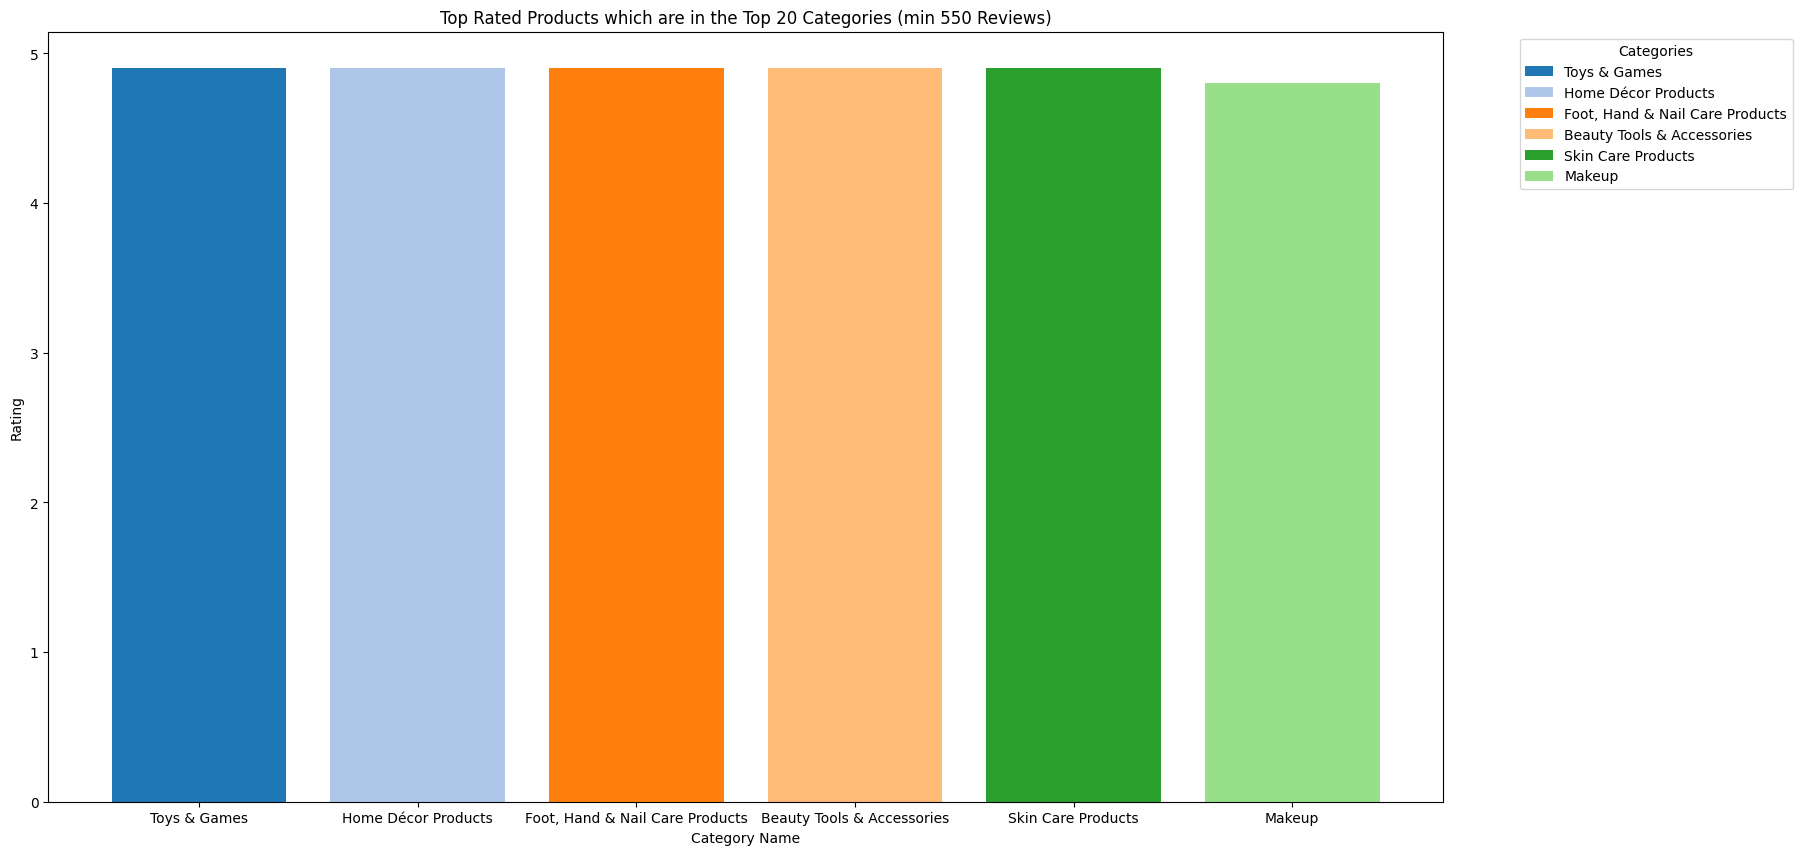

In [47]:
# Visualise findings
# Data to use in graph
# Filter the products within the top 20 categories with reviews >= 550
filtered_merged_df = merged_df[merged_df['reviews'] >= 550]

# Filter products within the top 20 Categories with reviews >= 550
filtered_merged_df = filtered_merged_df[filtered_merged_df['category_name'].isin(top_20_cat_sales['category_name'])]

# Group filtered dataframe to get top-rated product per category
top_rated_products = (
    filtered_merged_df.loc[filtered_merged_df.groupby('category_name')['stars'].transform('max') == filtered_merged_df['stars']]
)

# Sort the top_rated_products Dataframe by 'reviews' in ascending order within each category
top_rated_products = filtered_merged_df.reset_index(drop=True)
sorted_top_rated_products = top_rated_products.sort_values(['stars'] , ascending=False).groupby('category_name').head(1).reset_index(drop=True)
# sorted_top_rated_products = top_rated_products.sort_values(['stars'] , ascending=False).groupby('category_name').head(1)

# Create bar chart
plt.figure(figsize=(18,10)) # makes the chart wider for readability

# Custom colors — 20 different colors
color = plt.cm.tab20.colors  # You can also try plt.cm.Set3, plt.cm.Pastel1, etc.
# Plot bars and keep a handle to add legend
bars = plt.bar(sorted_top_rated_products['category_name'], sorted_top_rated_products['stars'], color=color)

# Legend with cateogry names
plt.legend(bars, sorted_top_rated_products['category_name'], title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')


# Formatting
plt.title('Top Rated Products which are in the Top 20 Categories (min 550 Reviews)')
plt.xlabel('Category Name')
plt.ylabel('Rating')

plt.show()

- The bar chart above shows the top rated products with at least 550 reviews which are in the top 20 Categories which made the most sales last month.

### 4.7 Identify Top 20 Products bought in the last month across all product categories

In [48]:
top_20_products_bought_in_last_month = merged_df.nlargest(20, 'boughtInLastMonth')
top_20_products_bought_in_last_month.head(5)

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,revenue
331036,B07MHJFRBJ,"Bounty Quick Size Paper Towels, White, 8 Family Rolls = 20 Regular Rolls",4.8,0,24.42,0.00,167,1,100000,Household Cleaning Supplies,2442000.0
331037,B074CR89QG,"Amazon Brand - Presto! Flex-a-Size Paper Towels, 158 Sheet Huge Roll, 12 Rolls (2 Packs of 6), Equivalent to 38 Regular Rolls, White",4.7,0,28.28,0.00,167,0,100000,Household Cleaning Supplies,2828000.0
331038,B00DU5SRIY,Stardrops - The Pink Stuff - The Miracle All Purpose Cleaning Paste,4.4,0,4.99,5.97,167,1,100000,Household Cleaning Supplies,499000.0
331040,B09BWFX1L6,"Amazon Basics 2-Ply Paper Towels, Flex-Sheets, 150 Sheets per Roll, 12 Rolls (2 Packs of 6), White",4.2,0,22.86,0.00,167,0,100000,Household Cleaning Supplies,2286000.0
466031,B09LH36816,"Hismile v34 Colour Corrector, Tooth Stain Removal, Teeth Whitening Booster, Purple Toothpaste, Colour Correcting, Hismile V34, Hismile Colour Corrector, Tooth Colour Corrector",3.4,0,20.69,29.00,126,1,100000,Oral Care Products,2069000.0


display the same on a graph and visualise the top product names across all product cateogries

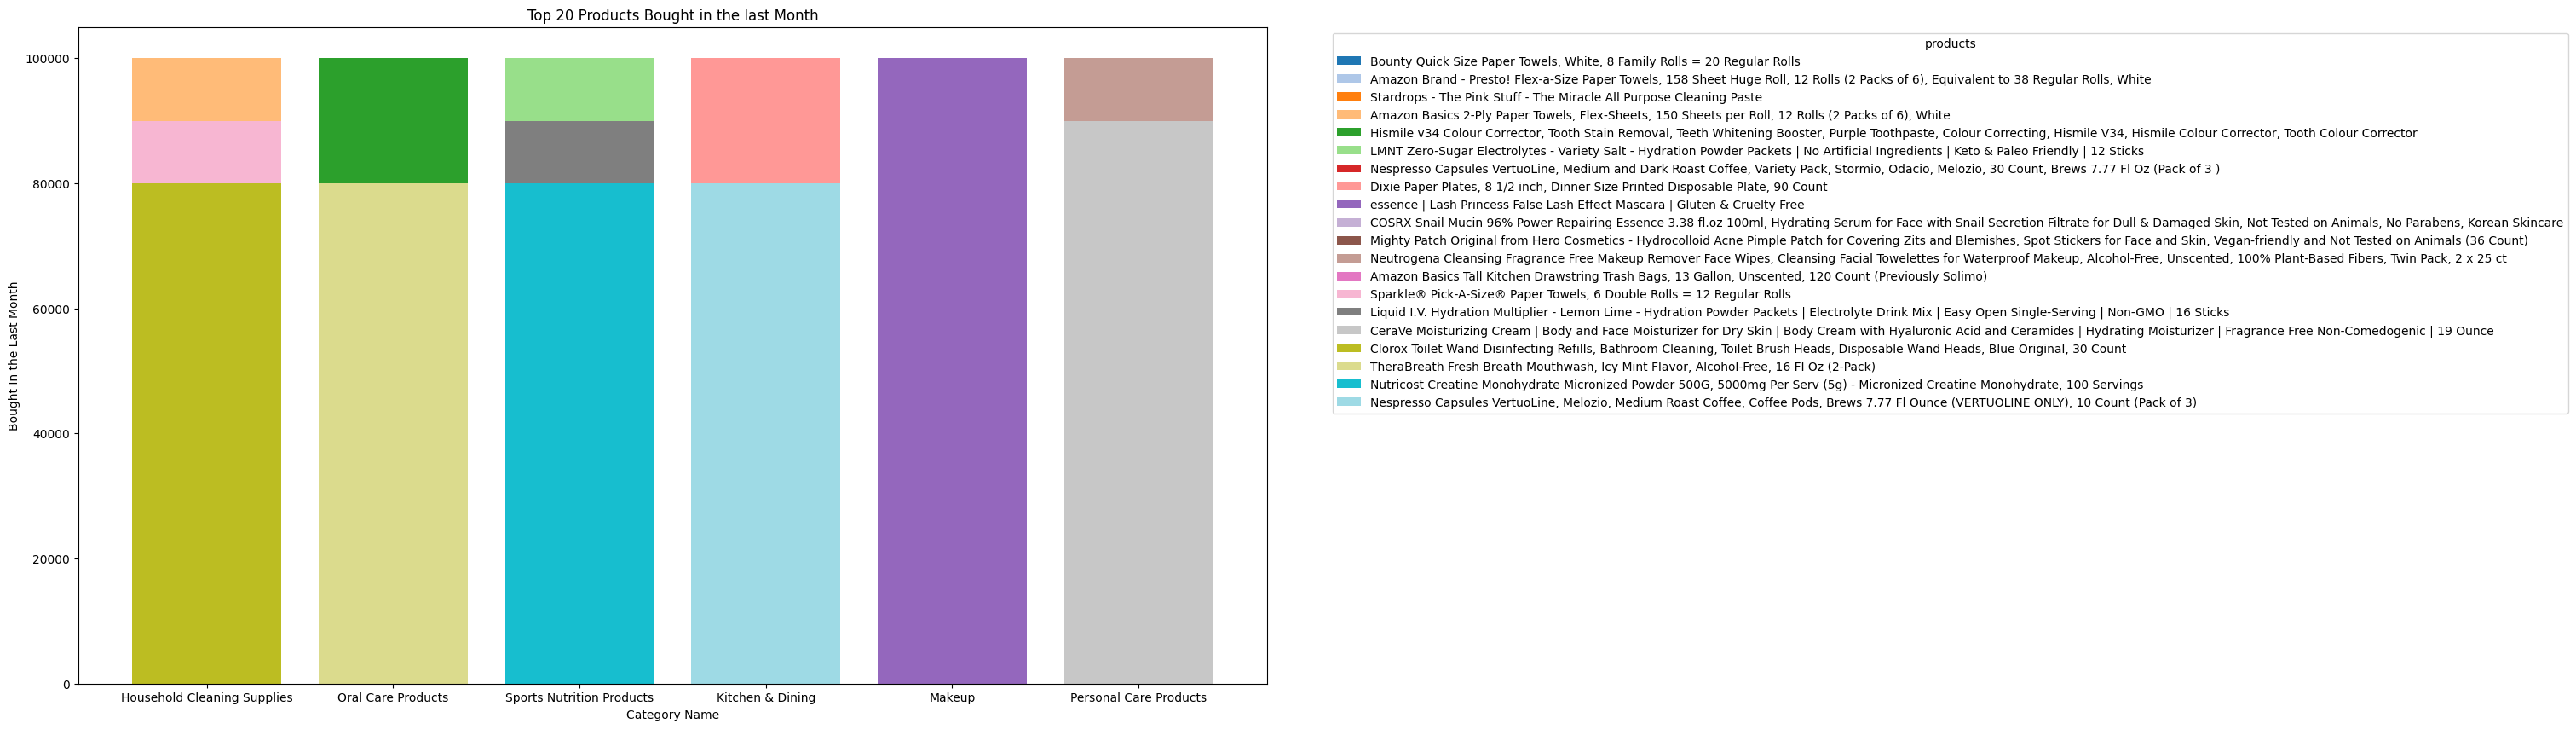

In [49]:

# Sort dataframe by 'BoughtInLastMonth' in descending order and select the top 20 products
top_20_products_bought_in_last_month = merged_df.nlargest(20, 'boughtInLastMonth')

# create an interactive bar chart
# Create bar chart
plt.figure(figsize=(18,10)) # makes the chart wider for readability

# Custom colors — 20 different colors
color = plt.cm.tab20.colors  # You can also try plt.cm.Set3, plt.cm.Pastel1, etc.
# Plot bars and keep a handle to add legend
bars = plt.bar(top_20_products_bought_in_last_month['category_name'], top_20_products_bought_in_last_month['boughtInLastMonth'], color=color)

# Legend with cateogry names
plt.legend(bars, top_20_products_bought_in_last_month['title'], title="products", bbox_to_anchor=(1.05, 1), loc='upper left')


# Formatting
plt.title('Top 20 Products Bought in the last Month')
plt.xlabel('Category Name')
plt.ylabel('Bought In the Last Month')

plt.show()


The graph shows the top 20 products which were bought in the last month.

To make the graph easier to view below is an interactive graph show the same as the above.

In [50]:
# Dataframes to use in graph
# Select the top 20 products
top_20_products_bought_in_last_month = merged_df.nlargest(20, 'boughtInLastMonth')

# Sort by 'boughtInLastMonth' to control x-axis order
top_20_products_bought_in_last_month = top_20_products_bought_in_last_month.sort_values(
    by='boughtInLastMonth', ascending=False
)
# Create interactive bar chart
fig = px.bar(
    top_20_products_bought_in_last_month,
    x='category_name',
    y='boughtInLastMonth',
    color='category_name',  # optional for color distinction
    hover_data=['title', 'boughtInLastMonth', 'price', 'reviews', 'stars', 'isBestSeller'],  # what to show on hover
    labels={'boughtInLastMonth': 'Bought in Last Month'},
    title='Top 20 Products Bought in the Last Month'
)

# Update layout for readability
fig.update_layout(
    xaxis_title='Category Name',
    yaxis_title='Bought in the Last Month',
    xaxis_tickangle=45,
    legend_title='Category',
    showlegend=False  # Hide default legend since hover shows product name
)

# Show the interactive chart
fig.show()


- By hovering your mouse over the graph you can easily view and get an insight of the product bought in the last month by product category and the exact product which was purchased.
- We can see exactly how many of these products were bought last month.

/* 
github cant view plotly.express graphs 
Link to interactive graph: https://www.dropbox.com/scl/fi/c7322y7g63ha6ulfwy3a3/interactive_plot.html?rlkey=x0ivrsw2sgdqjwxjetdh1evev&st=lkgvwlue&dl=0
*/

# Conclusion / Key Insights

- Only 0.6% of the products (8,520 out of ~1.42 million) are labeled as Best Sellers, while 99.4% are not.
- Out of all purchases made in the last month, 9.8% were Best Seller products, and 90.2% were non-Best Sellers. This indicates that Best Sellers, although a small subset, have a notable impact on monthly purchases.
- Kitchen& Dining, Hair and skin care, industrial and scientific, household cleaning products were amoungst the top categories with the high purchase volumes.

The top rated products which were also in the top 20 categories of most sales with a minimum of 550 reviews where:
- Toys & Games
- Home Decor Products
- Foot, Hand, Nail care products
- Beauty tools & accessories
- Skin care products
- Makeup

Top products which where bought in the last month regardless of views and ratings:
- Household cleaning supplies
- Oral care products
- Sports nutrition products
- Kitchen & dining
- Makeup
- Person care products

<br>

The most sought after product is a makeup product with $100K in sales is Lash Princess False Lash Effect Mascara which is also a best seller and has over 300K reviews and is only priced at $4.99.
<br>
This would be the ideal product to market and sell due to the high demand and cheap price of the product.